<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#독립동일분포" data-toc-modified-id="독립동일분포-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>독립동일분포</a></span><ul class="toc-item"><li><span><a href="#독립성" data-toc-modified-id="독립성-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>독립성</a></span></li><li><span><a href="#독립성과-무상관성" data-toc-modified-id="독립성과-무상관성-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>독립성과 무상관성</a></span></li><li><span><a href="#합의-분포" data-toc-modified-id="합의-분포-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>합의 분포</a></span><ul class="toc-item"><li><span><a href="#재생성" data-toc-modified-id="재생성-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>재생성</a></span></li><li><span><a href="#정규분포" data-toc-modified-id="정규분포-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>정규분포</a></span><ul class="toc-item"><li><span><a href="#시각화" data-toc-modified-id="시각화-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>시각화</a></span></li></ul></li><li><span><a href="#포아성-분포" data-toc-modified-id="포아성-분포-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>포아성 분포</a></span><ul class="toc-item"><li><span><a href="#시각화" data-toc-modified-id="시각화-1.3.3.1"><span class="toc-item-num">1.3.3.1&nbsp;&nbsp;</span>시각화</a></span></li></ul></li><li><span><a href="#베르누이-(-재생성-없음-)" data-toc-modified-id="베르누이-(-재생성-없음-)-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>베르누이 ( 재생성 없음 )</a></span><ul class="toc-item"><li><span><a href="#시각화" data-toc-modified-id="시각화-1.3.4.1"><span class="toc-item-num">1.3.4.1&nbsp;&nbsp;</span>시각화</a></span></li></ul></li><li><span><a href="#합의-분포와-표본평균의-분포" data-toc-modified-id="합의-분포와-표본평균의-분포-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>합의 분포와 표본평균의 분포</a></span></li></ul></li><li><span><a href="#중심극한정리" data-toc-modified-id="중심극한정리-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>중심극한정리</a></span><ul class="toc-item"><li><span><a href="#대수의-법칙" data-toc-modified-id="대수의-법칙-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>대수의 법칙</a></span></li></ul></li></ul></li></ul></div>

## 독립동일분포
- 확률변수가 서로 독립이라는 것은 호가률변수가 다른 확률변수에 영향을 끼치지 않는다는 의미이다.
- 통계분석에서 취급하는 데이터 중 상당수가 독립이면서 다차원인 확률변수의 실현값으로 간주될 수 있다.
- 서로 독립이고 각각 동일한 확률분포를 따르는 다차원 확률변수를 독립동일분포라 한다.
- 사랑해요~사랑해요~사랑해요~ lg~~

### 독립성
- 2개 이상의 확률변수가 서로 영향을 끼치지 않으며 관계가 없음을 나타내는 개념
- 2차원 확률변수 (X,Y)의 경우 다음과 같은 관계가 성립할 때 X,Y는 독립이라고 함
$f_{X,Y}(x,y) = f_X(x)f_Y(y)$
- 확률변수가 독립일 때 결합확률은 주변확률의 곱으로 작성할 수 있다.
- 일반화 : $f_{X_1,X_2,...,X_n}(x_1,x_2,...,x_n) = f_{X_1}(x_1)f_{X_2}(x_2)...f_{X_n}(x-n)$

※ 함수 f가 이산형이면 확률함수, 연속형이면 밀도함수를 나타냄

### 독립성과 무상관성
- 공분산이나 상관계수가 0일 때 무상관이라 하고 두 확률변수 사이에는 상관성, 즉 선형관계가 없음을 나타냄
- 독립성도 무상관성도 두 확률변수가 서로 관계가 없다는 것을 나타내는 성질이다.
 * 무상관성보다 독립성이 더 강한 개념
 * 2개의 확률변수 X와 Y가 독립일 때 X와 Y는 무상관이 되지만 X와Y가 반드시 독립인 것은 아님

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
linstyles = ['-','--',':','-.']
def E(XY,g):
    x_set,y_set, f_XY = XY
    return np.sum([g(x_i,y_j)*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])
def Cov(XY):
    x_set,y_set,f_XY=XY
    mean_X=E(XY,lambda x,y:x)
    mean_Y=E(XY,lambda x,y:y)
    return np.sum([(x_i-mean_X)*(y_j-mean_Y)*f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])
def f_X(x):
    return np.sum([f_XY(x,y_k)for y_k in y_set ])
def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])

In [3]:
# 왜곡된 주사위 1/21 2/21 ... 6/21
x_set=np.arange(1,7)  
y_set=np.arange(1,7)
def f_XY(x,y):
    if x in x_set and y in y_set:
        return x*y/441
    else:
        return 0
XY=[x_set,y_set,f_XY]

In [4]:
# 2차원 확률변수 X와 Y는 독립
# 공분산이 0이므로 무상관인 것을 알 수 a있음
Cov(XY)

-8.326672684688674e-17

In [5]:
# 무상관이 2개의 확률변수를 생각해보자
x_set=np.array([0,1])
y_set=np.array([-1,0,1])
def f_XY(x,y):
    if(x,y) in [(0,0),(1,1),(1,-1)]:
        return 1/3
    else:
        return 0
XY=[x_set,y_set,f_XY]

In [6]:
#공분산은 0 이므로 확률변수 X,Y는 무상관
Cov(XY)

0.0

In [7]:
# 𝑓𝑋,𝑌(𝑥,𝑦)=𝑓𝑋(𝑥)𝑓𝑌(𝑦) 성립함을 확인.
# 무상관이어도 독립성이 성립하지 않는 경우가 있음
f_X(0)*f_Y(0),f_XY(0,0)

(0.1111111111111111, 0.3333333333333333)

### 합의 분포
- 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1,X_2,...,X_n의 합 \sum_{i=1}^n X_i = X_1+X_2+...+X_n$이 따르는 확률분포를 의미
- 합의 분포를 이해하면 확률변수의 합을 나눈 표본평균의 분포도 쉅게 이해할 수 있음

#### 재생성
- 동일한 분포를 따르는 2개의 독립인 확률변수에 대해서 그 합도 동일한 확률분포가 되는 성질

#### 정규분포
- 서로 독립인 X ~ N(1,2), Y(2,3)이 있을 때 확률변수 X+Y의 분포는 N(3,5)를 따름

In [8]:
rv1=stats.norm(1,np.sqrt(2))
rv2=stats.norm(2,np.sqrt(3))
rv3=stats.norm(3,np.sqrt(5))
sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample+Y_sample
print('평균:',np.mean(X_sample),np.mean(Y_sample))
print('분산:',np.var(X_sample),np.var(Y_sample))
print('합의 평균, 분산:',np.mean(sum_sample),np.var(sum_sample))

평균: 1.0007431319911868 2.000532056874001
분산: 1.9989645553121327 3.0048424264731586
합의 평균, 분산: 3.001275188865187 5.007457227506443


##### 시각화

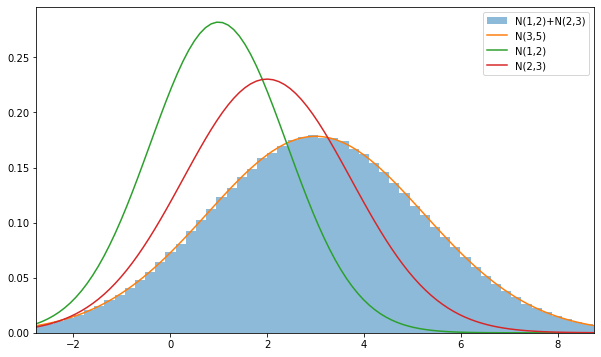

In [9]:
plt.figure(figsize=(10,6))
rv=stats.norm(3,np.sqrt(5))
xs=np.linspace(rv.isf(0.995),rv.isf(0.005),100)
plt.hist(sum_sample,bins=100,density=True,alpha=0.5,label='N(1,2)+N(2,3)')
plt.plot(xs,rv.pdf(xs),label='N(3,5)')
plt.plot(xs,rv1.pdf(xs),label='N(1,2)')
plt.plot(xs,rv2.pdf(xs),label='N(2,3)')
plt.legend()
plt.xlim(rv.isf(0.995),rv.isf(0.005))
plt.show()

#### 포아성 분포
- 서로 독립인 X ~ Poi(3)과 Y ~ Poi(4)가 있을 때 확률변수 X+Y도 포아송 분포를 따르고 X+Y ~ Poi(7)이 된다.
- n개의 포아송 분포의 합이 되더라도 재생성에 의하여 포아송 분포를 따른다.

In [10]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)
sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample+Y_sample
print('평균:',np.mean(X_sample),np.mean(Y_sample))
print('분산:',np.var(X_sample),np.var(Y_sample))
print('합의 평균, 분산:',np.mean(sum_sample),np.var(sum_sample))

평균: 2.99992 4.000478
분산: 2.997151993599999 4.004879771516
합의 평균, 분산: 7.000398 7.023093841596004


##### 시각화
- 서로 독립인 n개의 확률변수가 포아송 분포에 대하여 그 합도 재생성에 의해 포아송 분포의 형태를 유지한다.

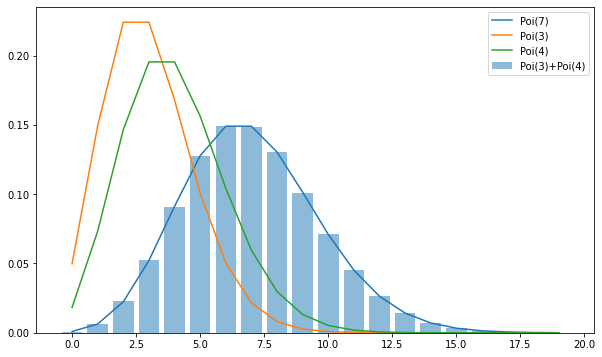

In [11]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,6))
rv=stats.poisson(7)
xs=np.arange(20)
hist,_=np.histogram(sum_sample,bins=20,range=(0,20),density=True)
# plt.hist(sum_sample,bins=100,density=True,alpha=0.5,label='N(1,2)+N(2,3)')
plt.bar(xs,hist,alpha=0.5,label='Poi(3)+Poi(4)')
plt.plot(xs,rv.pmf(xs),label='Poi(7)')
plt.plot(xs,rv1.pmf(xs),label='Poi(3)')
plt.plot(xs,rv2.pmf(xs),label='Poi(4)')
plt.legend()

#### 베르누이 ( 재생성 없음 )
- 베르누이 분포에는 재생성이 없다.
- 베르누이 분포의 합은 이항분포가 되는 성질이 있다.

In [12]:
#성공 확률이 0.3%인 베르누이 분포를 따르는  확률변수 10개에 대하여 백만번 포본을 추출하여 표본평균과 표본분산을 산출
# 표본 데이터가 하나이면 베르누이분포가 되고 표본 데이터가 여럿이면 이항분포가 된다.
np.random.seed(0)
p=0.3
rv=stats.bernoulli(p)
sample_size = int(1e6)
X_sample = rv.rvs((10,sample_size))
X_sample.shape
print('표본 추출:',X_sample.shape,'\n','첫번째 열:',X_sample[:0])
sum_sample=np.sum(X_sample,axis=0)
print('성공 횟수:',sum_sample)

print('성공 횟수의 평균,분산',np.mean(sum_sample),np.var(sum_sample,ddof=1))

표본 추출: (10, 1000000) 
 첫번째 열: []
성공 횟수: [4 5 4 ... 5 5 1]
성공 횟수의 평균,분산 3.001153 2.1007397713307716


##### 시각화

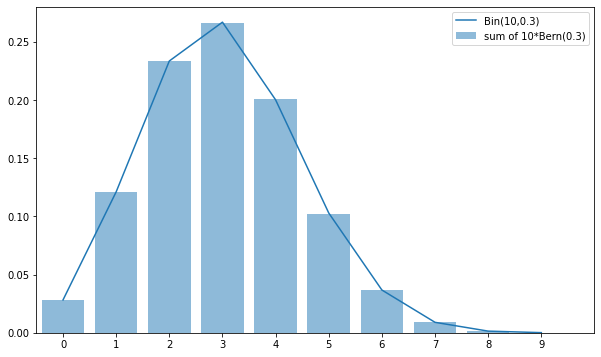

In [13]:
# 밀도 설정을 넣어주어 정규화를 하면 전체 데이터 개수 중에 해당 구간의 값 개수가 차지하는 비율로 변환
plt.figure(figsize=(10,6))
rv=stats.binom(10,p)
xs=np.arange(10)
hist,_=np.histogram(sum_sample,bins=10,range=(0,10),density=True)
plt.bar(xs,hist,alpha=0.5,label='sum of 10*Bern(0.3)')
plt.plot(xs,rv.pmf(xs),label='Bin(10,0.3)')
plt.legend()
plt.xlim(-0.5,10)
plt.xticks(np.arange(10))
plt.show()

표본평균의 분포
- 표본평균의 분포란 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1,X_2,...,X_n$의 표본평균이 따르는 분포
- 이 분포는 중심극한 정리나 대수의 법칙등 추측통꼐에서 중요한 성질을 담고 있기 때문에 유의해야 함

$E(\bar{X})=\mu$<br>
$V(\bar{X})={\sigma}^2/n$

In [14]:
#정규분포의 표본평균 분포
mean=1
var=2
rv=stats.norm(mean,np.sqrt(var))
n=10
sample_size=int(1e6)
X_sample=rv.rvs((n,sample_size))
print('표본 사이즈 10, 표본 개수 100000:',X_sample.shape)
sample_mean=np.mean(X_sample,axis=0)
print('표본평균 백만개:',sample_mean,len(sample_mean))
print('표본평균 백만개의 평균, 분산:',np.mean(sample_mean),np.var(sample_mean,ddof=1))

표본 사이즈 10, 표본 개수 100000: (10, 1000000)
표본평균 백만개: [1.26301629 0.73094529 1.48186978 ... 1.78129977 1.12365901 0.00466411] 1000000
표본평균 백만개의 평균, 분산: 1.0003269102347059 0.19984686009715635


(-0.38199390057143456, 2.381993900571435)

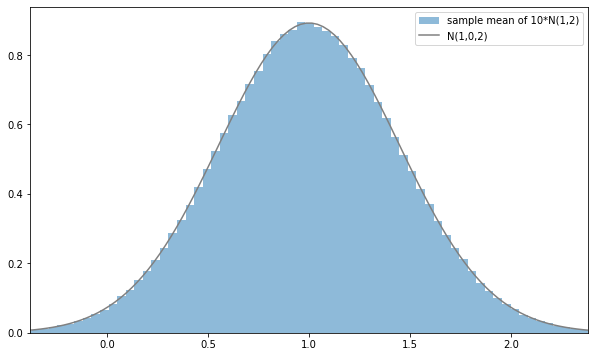

In [15]:
plt.figure(figsize=(10,6))
rv_true=stats.norm(mean,np.sqrt(var/n))
xs=np.linspace(rv_true.isf(0.999),rv_true.isf(0.001),100)
plt.hist(sample_mean,bins=100,density=True,alpha=0.5,label='sample mean of 10*N(1,2)')
plt.plot(xs,rv_true.pdf(xs),label='N(1,0,2)',color='gray')
plt.legend()
plt.xlim(rv_true.isf(0.999),rv_true.isf(0.001))

(0.0, 6.0)

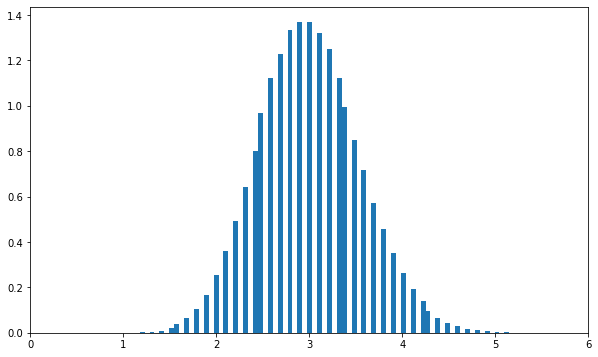

In [45]:
#포아송 분포의 표본평균 분포는 정규분포에 근사하는걸 입증하시오
l=3
rv=stats.poisson(l)

n=10
sample_size=int(1e6)
Xs_sample = rv.rvs((n,sample_size))

sample_mean = np.mean(Xs_sample,axis=0)
# 기대값과 분산겂이 다르다는건 포아송 분포를 따르지 않음을 알수 있다.
np.mean(sample_mean),np.var(sample_mean)

# 중심극한 정리에 의하여 좌우대칭인 산 모양의 정규분포에 근사한다.
plt.figure(figsize=(10,6))
plt.hist(sample_mean,bins=100,density=True)
plt.xlim(l-l,l+l)

#### 합의 분포와 표본평균의 분포
- 포아송 분포나 정규분포 같은 재생성이 있는 일부 확률분포를 제외하면 합의 분포가 어떤 형태를 보이는지 일반적으로 알 수 없다.
- 표본평균의 분포가 되면 재생성을 지닌 포아송 분포 조차도 그 형태를 유지할 수 없다.
- 원래 분포가 무엇이었든지 간에 표본평균의 분포는 정규분포에 근사한다.

### 중심극한정리
- 확률변수 $X_1,X_2,...,X_n$이 서로 독립이고 기댓값이 $\mu, 분산이 {\sigma}^2$인 확률분포를 따를 때 n이 커짐에 따라 표본평균 $\bar{X}의 분포는 정규분포 N(\mu,{\sigma}^2/n)$에 가까워진다.

In [48]:
#[과제] 중심극한정리를 입증하세요.
l=3
rv=stats.poisson(l)
n=10000
sample_size=10000
Xs_sample = rv.rvs((n,sample_size))
sample_mean=np.mean(Xs_sample,axis=0)
rv_true = stats.norm(l,np.sqrt(l/n))
xs=np.linspace(rv_true.isf(0.999),rv_true.isf(0.001),100)

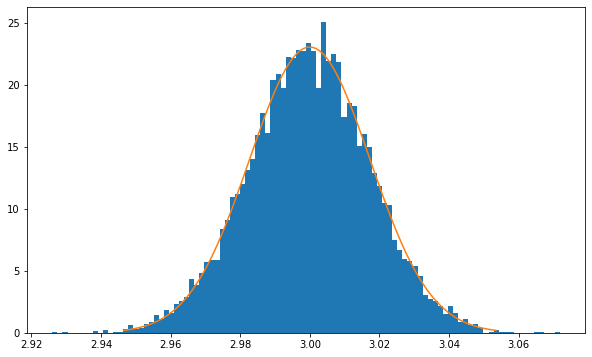

In [49]:
plt.figure(figsize=(10,6))
plt.hist(sample_mean,bins=100,density=True)
plt.plot(xs,rv_true.pdf(xs))

#### 대수의 법칙
-확률변수 $X_1,X_2,...,X_n$이 서로 독립이고 평균이 $\mu, 분산이 \sigma^2$일 것 같은 확률분포를 다를때 n이 커짐에 따라 표본평균은  $\mu$에 수렵한다.

In [126]:
#[과제] sample_size의 변화에 따라 표본평균이 모평균에 수렴함을 입증하세요.
p=1/6
rv=stats.bernoulli(p)

n=int(1e5)
sample = rv.rvs((n,4))
space = np.linspace(100,n,50).astype(int)
plot_list=np.array([np.mean(sample[:sp],axis=0)
                    for sp in space]).T

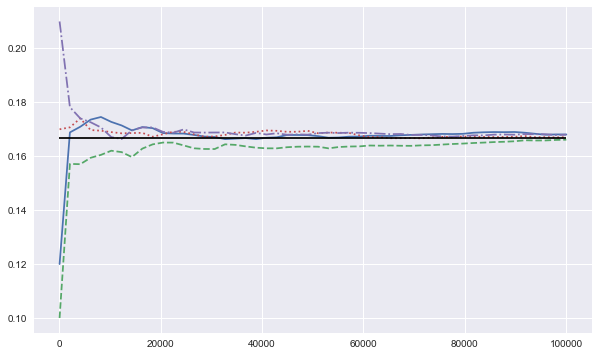

In [144]:
plt.figure(figsize=(10,6))
for pl,ls in zip(plot_list,linstyles):
    plt.plot(space,pl,ls=ls)
plt.hlines(p,-1,n,'k')


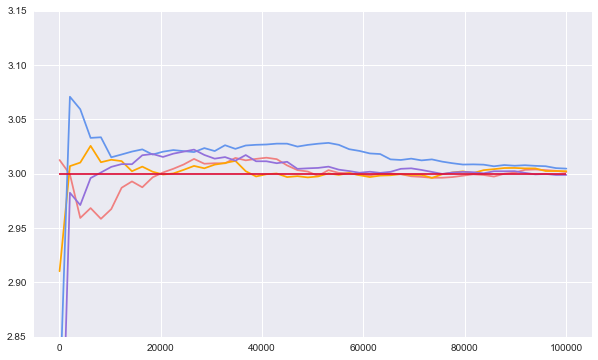

In [152]:

plt.style.use('seaborn')
rv = stats.chi2(3)
sample = rv.rvs((100000,4))

color=['lightcoral','orange','cornflowerblue','mediumpurple']

plt.figure(figsize=(10,6))
size = np.linspace(100,100000,50).astype(int)
area = np.array([np.mean(sample[:i],axis=0) for i in size]).T

for i, color in zip(area, color):
    plt.plot(size, i, color=color)
plt.hlines(rv.mean(),0,100000,color='crimson')
plt.ylim(2.85,3.15)

plt.show()
